<a href="https://colab.research.google.com/github/yunjeong-chang/smarcle-winter-study/blob/main/CNN_MNIST_DATA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import os

seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(3)

In [ ]:
#MNIST 데이터 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

#차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

#바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05332, saving model to ./model/01-0.0533.hdf5

Epoch 00002: val_loss improved from 0.05332 to 0.03941, saving model to ./model/02-0.0394.hdf5

Epoch 00003: val_loss improved from 0.03941 to 0.03689, saving model to ./model/03-0.0369.hdf5

Epoch 00004: val_loss improved from 0.03689 to 0.03296, saving model to ./model/04-0.0330.hdf5

Epoch 00005: val_loss improved from 0.03296 to 0.03160, saving model to ./model/05-0.0316.hdf5

Epoch 00006: val_loss improved from 0.03160 to 0.03141, saving model to ./model/06-0.0314.hdf5

Epoch 00007: val_loss improved from 0.03141 to 0.03062, saving model to ./model/07-0.0306.hdf5

Epoch 00008: val_loss did not improve from 0.03062

Epoch 00009: val_loss did not improve from 0.03062

Epoch 00010: val_loss did not improve from 0.03062

Epoch 00011: val_loss improved from 0.03062 to 0.02771, saving model to ./model/11-0.0277.hdf5

Epoch 00012: val_loss improved from 0.02771 to 0.02631, saving model to ./model

In [ ]:
#테스트셋 정확도 출력
print("Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9928
Test Accuracy: 0.9928


In [ ]:
#테스트셋의 오차
y_vloss = history.history['val_loss']
#학습셋의 오차
y_loss = history.history['loss']

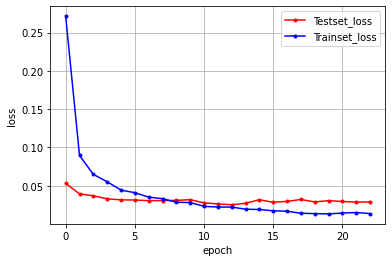

In [ ]:
#그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()